In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geeksw.hgcal.testbeam as hgc

In [2]:
runlist = hgc.runlist

In [13]:
run_numbers=runlist.query('Particle=="electron"').Run.values
run_beamenergies=runlist.query('Particle=="electron"').Energy.values
mean_rechit_sum=[]
beamenergies=[]
rechit_z=[]
i=0

In [14]:
for run, beam_energy in zip(run_numbers, run_beamenergies):
    try :
        hdf=pd.read_hdf("data/ntuples/v9/ntuple_{0}.hdf".format(run), "rechitntupler/hits").set_index("event")
        rechit_energy1=hdf.groupby("event").rechit_energy.sum().mean()
        rechit_z1=hdf.groupby("event").rechit_z.sum().mean()
        print(beam_energy, rechit_energy1,rechit_z1)
        beamenergies.append(beam_energy)
        rechit_z.append(rechit_z1)
        mean_rechit_sum.append(rechit_energy1)
        i += 1
        if i == 5:
            break
    except :
        pass


150 10100.9 51824.4
150 10037.3 50863.3
150 10038.8 50973.2
150 9975.43 51011.9
150 10046.0 50927.2


In [15]:
dictionnary = pd.DataFrame(
    {
        "mean_rechit_sum" : mean_rechit_sum,
        "rechit_z" : rechit_z,
        "beamenergies" : beamenergies
    })
dictionnary.to_hdf("the temporary datas", key="dataframe")
dictionnary.to_csv("the temporary datas")

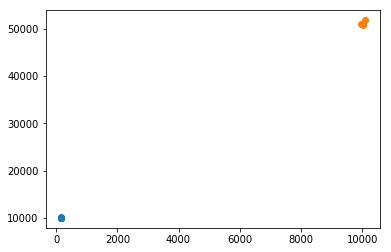

In [16]:
plt.scatter(beamenergies,mean_rechit_sum)
plt.scatter(mean_rechit_sum,rechit_z)
plt.show()